In [1]:
import h5py 
import numpy as np
def import_tfmodisco_motifs(tfm_results_path, trim=True, only_pos=True):
    """
    Imports the PFMs to into a dictionary, mapping `(x, y)` to the PFM,
    where `x` is the metacluster index and `y` is the pattern index.
    Arguments:
        `tfm_results_path`: path to HDF5 containing TF-MoDISco results
        `out_dir`: where to save motifs
        `trim`: if True, trim the motif flanks based on information content
        `only_pos`: if True, only return motifs with positive contributions
    Returns the dictionary of PFMs.
    """ 
    pfms = {}
    with h5py.File(tfm_results_path, "r") as f:
        metaclusters = f["metacluster_idx_to_submetacluster_results"]
        num_metaclusters = len(metaclusters.keys())
        for metacluster_i, metacluster_key in enumerate(metaclusters.keys()):
            metacluster = metaclusters[metacluster_key]
            print(len(metacluster["seqlets"].value))
            if "patterns" not in metacluster["seqlets_to_patterns_result"]:
                continue
            patterns = metacluster["seqlets_to_patterns_result"]["patterns"]
            num_patterns = len(patterns["all_pattern_names"][:])
            for pattern_i, pattern_name in enumerate(patterns["all_pattern_names"][:]):
                pattern_name = pattern_name.decode()
                pattern = patterns[pattern_name]
                key = "metacluster_"+str(metacluster_i)+".pattern_"+str(pattern_i)
                
                if key not in pfms:
                    pfms[key] = []

                for seqlet in patternc:
                    #print(seqlet.decode("utf-8"))
                    pfms[key].append(seqlet.decode("utf-8"))
               
    return pfms

In [2]:
tfm_results_path="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/modisco_jun_30/modisco/DNASE/K562/modisco_crop_500_100K_seqs_1/modisco_results_allChroms_counts.hdf5"
pfms = import_tfmodisco_motifs(tfm_results_path)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


100000
110


In [3]:
pfms.keys()

dict_keys(['metacluster_0.pattern_0', 'metacluster_0.pattern_1', 'metacluster_0.pattern_2', 'metacluster_0.pattern_3', 'metacluster_0.pattern_4', 'metacluster_0.pattern_5', 'metacluster_0.pattern_6', 'metacluster_0.pattern_7', 'metacluster_0.pattern_8', 'metacluster_0.pattern_9', 'metacluster_0.pattern_10', 'metacluster_0.pattern_11', 'metacluster_0.pattern_12', 'metacluster_0.pattern_13', 'metacluster_0.pattern_14', 'metacluster_0.pattern_15', 'metacluster_0.pattern_16', 'metacluster_0.pattern_17', 'metacluster_0.pattern_18', 'metacluster_0.pattern_19', 'metacluster_0.pattern_20', 'metacluster_0.pattern_21', 'metacluster_0.pattern_22', 'metacluster_0.pattern_23', 'metacluster_0.pattern_24', 'metacluster_0.pattern_25', 'metacluster_0.pattern_26', 'metacluster_0.pattern_27', 'metacluster_0.pattern_28', 'metacluster_0.pattern_29', 'metacluster_0.pattern_30', 'metacluster_0.pattern_31', 'metacluster_1.pattern_0', 'metacluster_1.pattern_1', 'metacluster_1.pattern_2'])

In [4]:
import pandas as pd
tomtom="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/modisco_jun_30/modisco/DNASE/K562/modisco_crop_500_100K_seqs_1/counts.tomtom.tsv"
tomtom = pd.read_csv(tomtom, sep="\t", header=0)
    

In [5]:
bed="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/modisco_jun_30/modisco/DNASE/K562/K562_full.interpreted_regions.bed"
bed = pd.read_csv(bed, sep="\t", header=None)


In [6]:
lists=[]
for key in pfms:
    print(key)
    if key in tomtom["Pattern"].values:
        match_name = tomtom[tomtom["Pattern"]==key]["Match_1"]
        keyd = key.split("_")[1].replace(".pattern","")+"_"+key.split("_")[-1]+"_"+match_name
        keyd = keyd.values[0]
        #print(keyd.values[0])
        for seqlet in pfms[key]:
            vals = seqlet.split(",")
            peak_id = int(vals[0].split(":")[1])
            ss = vals[1].split(":")[1]
            ee = vals[2].split(":")[1]
            blist = [bed.loc[peak_id,0], bed.loc[peak_id,1]+bed.loc[peak_id,9]-250+int(ss), bed.loc[peak_id,1]+bed.loc[peak_id,9]-250+int(ee), keyd]
            lists.append(blist)
    else:
        print(key)
            

metacluster_0.pattern_0
metacluster_0.pattern_1
metacluster_0.pattern_2
metacluster_0.pattern_3
metacluster_0.pattern_4
metacluster_0.pattern_5
metacluster_0.pattern_6
metacluster_0.pattern_7
metacluster_0.pattern_8
metacluster_0.pattern_9
metacluster_0.pattern_10
metacluster_0.pattern_11
metacluster_0.pattern_12
metacluster_0.pattern_13
metacluster_0.pattern_14
metacluster_0.pattern_15
metacluster_0.pattern_16
metacluster_0.pattern_17
metacluster_0.pattern_18
metacluster_0.pattern_19
metacluster_0.pattern_20
metacluster_0.pattern_21
metacluster_0.pattern_22
metacluster_0.pattern_23
metacluster_0.pattern_24
metacluster_0.pattern_25
metacluster_0.pattern_26
metacluster_0.pattern_27
metacluster_0.pattern_28
metacluster_0.pattern_29
metacluster_0.pattern_30
metacluster_0.pattern_31
metacluster_1.pattern_0
metacluster_1.pattern_1
metacluster_1.pattern_2


In [7]:
print(len(lists))
data = pd.DataFrame(lists)
print(data.head())

65489
       0          1          2                 3
0  chr11   69905752   69905782  0_0_GATA3_GATA_1
1  chr10   24569442   24569472  0_0_GATA3_GATA_1
2   chr1   26378607   26378637  0_0_GATA3_GATA_1
3  chr11     876148     876178  0_0_GATA3_GATA_1
4  chr14  103314758  103314788  0_0_GATA3_GATA_1


In [8]:
#data.to_csv("modisco_annotations_k562_dnase.bed", sep="\t", header=False, index=False)
data = pd.read_csv("modisco_annotations_k562_dnase.bed", sep="\t", header=None)

In [9]:
print(data.shape)

(65489, 4)


In [10]:
data.drop_duplicates().shape

(64392, 4)

In [11]:
sum(data[3]=="0_0_GATA3_GATA_1")

16337

In [12]:
dict1={0: 16818, 5: 4414, 3: 8931, 4: 7457, 9: 1495, 2: 9688, 8: 1821, 1: 11947, 6: 3845, 7: 3019, 11: 657, 10: 1251}



In [13]:
sum(list(dict1.values()))

71343

In [14]:
#bed_cwm="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/K562_02.08.2022_bias_128_4_2356/06_22_2022_motif_scanning/mean_moods_baseairmodels_counts_new_divide_by_total_score/modsico_intersect_overlaps_resolved_based_on_cwm_activations_normed_length.bed"
#bed_cwm="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/K562_02.08.2022_bias_128_4_2356/06_22_2022_motif_scanning/mean_moods_baseairmodels_counts_new_divide_by_total_score/modsico_intersect_resolved_based_on_cwm.bed"
#bed_cwm="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/K562_02.08.2022_bias_128_4_2356/06_22_2022_motif_scanning/mean_moods_baseairmodels_counts_new_divide_by_total_score/modisco_intersect_overlaps_resolved_based_on_cwm_activations.bed"
bed_cwm="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/K562_02.08.2022_bias_128_4_2356/06_22_2022_motif_scanning/mean_moods_baseairmodels_counts_new_divide_by_total_score/modisco_annotated_overlaps_resolved_based_on_cwm_activations_subset.bed"

#bed_pwm="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/K562_02.08.2022_bias_128_4_2356/06_22_2022_motif_scanning/mean_moods_baseairmodels_counts_new_divide_by_total_score/modisco_intersect_non_overlaps_resolved.bed"
#bed_cwm="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/K562_02.08.2022_bias_128_4_2356/06_22_2022_motif_scanning/mean_moods_baseairmodels_counts_new_divide_by_total_score/overlaps_resolved_based_on_cwm_activations_trim_intersect_with_modisco.bed"
#bed_pwm="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/K562_02.08.2022_bias_128_4_2356/06_22_2022_motif_scanning/mean_moods_baseairmodels_counts_new_divide_by_total_score/modisco_overlaps_resolved_based_on_pwm.bed"
bed_pwm="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/K562_02.08.2022_bias_128_4_2356/06_22_2022_motif_scanning/mean_moods_baseairmodels_counts_new_divide_by_total_score/modisco_annotated_overlaps_resolved_based_on_pwm_subset.bed"



In [15]:
cwms = pd.read_csv(bed_cwm, sep="\t", header=None).drop_duplicates()
pwms = pd.read_csv(bed_pwm, sep="\t", header=None).drop_duplicates()


In [16]:
cwms.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,chr11,69905752,69905782,0_0_GATA3_GATA_1,chr11,69905760,69905765,0_0_GATA3_GATA_1,-,6.699131,56532,44.892879,81288,1.105895,5
1,chr10,24569442,24569472,0_0_GATA3_GATA_1,chr10,24569459,24569464,0_0_GATA3_GATA_1,+,6.699131,37000,42.849791,52019,1.119128,5
2,chr1,26378607,26378637,0_0_GATA3_GATA_1,chr1,26378615,26378620,0_0_GATA3_GATA_1,-,6.699131,5922,47.568990,8918,0.988002,5
3,chr11,876148,876178,0_0_GATA3_GATA_1,chr11,876165,876170,0_0_GATA3_GATA_1,+,6.699131,48121,50.377062,68298,1.081268,5
4,chr14,103314758,103314788,0_0_GATA3_GATA_1,chr14,103314775,103314780,0_0_GATA3_GATA_1,+,6.699131,90138,47.612621,130556,1.010144,5


In [24]:
all_uniq = list(set(cwms[7].values.tolist()+pwms[7].values.tolist()))
print(all_uniq)

['0_9_STA5A_MOUSE.H11MO.0.A', '0_0_GATA3_GATA_1', '0_3_BACH2_MOUSE.H11MO.0.A', '0_5_NFIA_HUMAN.H11MO.0.C', '0_6_NFYB_HUMAN.H11MO.0.A', '0_8_FOSL1+JUN_MA1129.1', '0_10_ETV4_MOUSE.H11MO.0.B', '0_2_KLF12_HUMAN.H11MO.0.C', '0_4_Gabpa_MA0062.2', '0_7_NRF1_MOUSE.H11MO.0.A', '0_1_CTCF_MA0139.1']


In [30]:
motifs=[]
pwms_all=[]
cwms_all=[]
for motif in all_uniq:
    if motif != "0_0_GATA3_GATA_1":
        continue
    
    #if motif != "0_1_CTCF_MA0139.1":
     #   continue
        
    if int(motif.split("_")[0]) != 0:
        continue
        
    #if int(motif.split("_")[1]) != 11:
    #    continue
        
    modisco_hits = data[data[3]==motif]
    
    # all hits with labels
    temp = modisco_hits.merge(cwms, on=[0, 1, 2, 3], how="inner").drop_duplicates()
    temp["id"] = temp[0].astype(str)+"_"+temp[1].astype(str)+"_"+temp[2].astype(str)

    # all hits with correct predictions
    dwms = temp[temp[7]==motif].drop_duplicates(subset=[0, 1, 2, 3])
    dwms["id"] = dwms[0].astype(str)+"_"+dwms[1].astype(str)+"_"+dwms[2].astype(str)
    recovered_cwms = dwms.shape[0]
   
    #dwms = temp[(temp[7]=="0_15_CTCF_MA0139.1") | (temp[7]==motif)].drop_duplicates(subset=[0, 1, 2, 3])
    dwms["id"] = dwms[0].astype(str)+"_"+dwms[1].astype(str)+"_"+dwms[2].astype(str)
    recovered_cwms = dwms.shape[0]
    
    # all failed hits 
    print("CWM failure cases")
    ttms = temp[~temp["id"].isin(dwms["id"])].drop_duplicates(subset=[0, 1, 2, 3])
    print(ttms.head(100))

    # all hits with labels   
    temp = modisco_hits.merge(pwms, on=[0, 1, 2, 3], how="inner").drop_duplicates()
    temp["id"] = temp[0].astype(str)+"_"+temp[1].astype(str)+"_"+temp[2].astype(str)

    # all hits with correct predictions
    dwms = temp[temp[7]==motif].drop_duplicates(subset=[0, 1, 2, 3])
    #dwms = temp[(temp[7]=="0_15_CTCF_MA0139.1") | (temp[7]==motif)].drop_duplicates(subset=[0, 1, 2, 3])

    dwms["id"] = dwms[0].astype(str)+"_"+dwms[1].astype(str)+"_"+dwms[2].astype(str)
    recovered_pwms = dwms.shape[0]
    
    # all failed hits 
    print("PWM failure cases")
    ttms = temp[~temp["id"].isin(dwms["id"])].drop_duplicates(subset=[0, 1, 2, 3])
    print(ttms.head())
    
    motifs.append(motif)
    pwms_all.append(recovered_pwms*100/modisco_hits.shape[0])
    cwms_all.append(recovered_cwms*100/modisco_hits.shape[0])
    
    #for i,r in modisco_hits.iterrows():
    #    dwms = cwms[(cwms[3]==r[3]) &  (cwms[2]==r[2]) & (cwms[1]==r[1]) & (cwms[0]==r[0])]
    #    if motif in dwms[7].values:
    #        recovered+=1
    #print(motif)
    #print("cwm",recovered_cwms*100/modisco_hits.shape[0])
    #print("pwm",recovered_pwms*100/modisco_hits.shape[0])
        

CWM failure cases
          0          1          2                 3      4          5  \
114   chr11   66886246   66886276  0_0_GATA3_GATA_1  chr11   66886249   
141   chr11   70773072   70773102  0_0_GATA3_GATA_1  chr11   70773071   
495   chr14  101552854  101552884  0_0_GATA3_GATA_1  chr14  101552858   
679   chr15   89911074   89911104  0_0_GATA3_GATA_1  chr15   89911096   
717   chr15   70633633   70633663  0_0_GATA3_GATA_1  chr15   70633655   
...     ...        ...        ...               ...    ...        ...   
5605   chr1  180282610  180282640  0_0_GATA3_GATA_1   chr1  180282621   
5641   chr1  198122847  198122877  0_0_GATA3_GATA_1   chr1  198122873   
5722  chr12   22562837   22562867  0_0_GATA3_GATA_1  chr12   22562846   
5725  chr14   75284172   75284202  0_0_GATA3_GATA_1  chr14   75284165   
5743  chr16   90022615   90022645  0_0_GATA3_GATA_1  chr16   90022619   

              6                          7  8         9      10         11  \
114    66886263   0_5_NFIA_

In [26]:
import matplotlib.pyplot as plt

0_9_STA5A_MOUSE.H11MO.0.A 0.0
0_9_STA5A_MOUSE.H11MO.0.A (93.27036599763872, 93.27036599763872)
0_0_GATA3_GATA_1 0.2019954704046114
0_0_GATA3_GATA_1 (79.54336781538838, 79.74536328579299)
0_3_BACH2_MOUSE.H11MO.0.A 0.16027475672581204
0_3_BACH2_MOUSE.H11MO.0.A (92.57012020606754, 92.73039496279335)
0_5_NFIA_HUMAN.H11MO.0.C 1.261595547309824
0_5_NFIA_HUMAN.H11MO.0.C (92.83858998144713, 94.10018552875695)
0_6_NFYB_HUMAN.H11MO.0.A 0.05599104143337286
0_6_NFYB_HUMAN.H11MO.0.A (92.32922732362822, 92.38521836506159)
0_8_FOSL1+JUN_MA1129.1 -0.6427915518824676
0_8_FOSL1+JUN_MA1129.1 (75.57392102846649, 74.93112947658402)
0_10_ETV4_MOUSE.H11MO.0.B -0.1319261213720324
0_10_ETV4_MOUSE.H11MO.0.B (92.34828496042216, 92.21635883905013)
0_2_KLF12_HUMAN.H11MO.0.C -0.5072307360241837
0_2_KLF12_HUMAN.H11MO.0.C (87.52428232246925, 87.01705158644506)
0_4_Gabpa_MA0062.2 1.007194244604321
0_4_Gabpa_MA0062.2 (82.41007194244604, 83.41726618705036)
0_7_NRF1_MOUSE.H11MO.0.A 0.6181318681318686
0_7_NRF1_MOUSE.H11MO

Text(0, 0.5, 'CWM based resolvign')

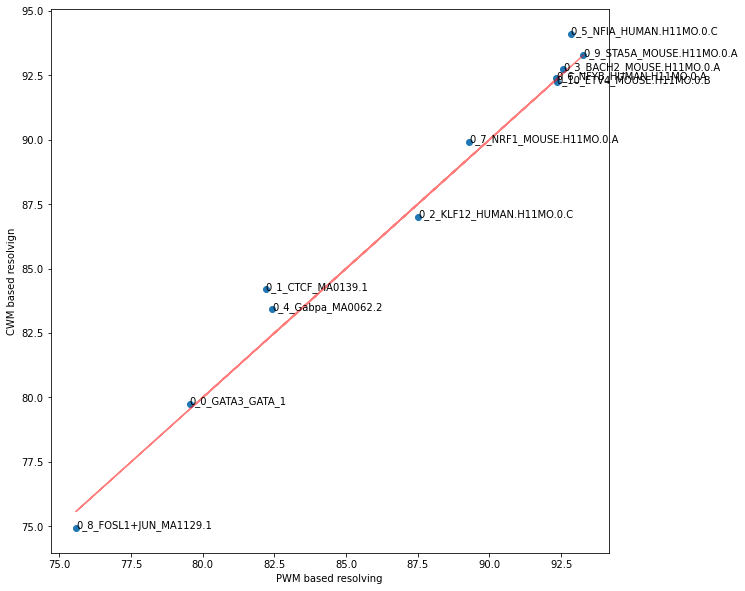

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(pwms_all,cwms_all)
ax.plot(pwms_all,pwms_all,"r-", alpha=0.5)

for i, r in enumerate(motifs):
    print(r,cwms_all[i]-pwms_all[i])
    ax.annotate(r,(pwms_all[i],cwms_all[i]))
    print(r,(pwms_all[i],cwms_all[i]))

#ax.set_yscale('log')
#ax.set_xscale('log')

plt.xlabel('PWM based resolving')
plt.ylabel('CWM based resolvign') 
    